# Problem set ztp370 - AppStat 2022/2023




### Author: 
- Eric Steen Ravn Bowman

### Date:    
- 03-01-2023 

***

As always we will include a collection of libraries (Standard)

In [1]:
import numpy as np                                     # Matlab like syntax for linear algebra and functions
from numpy.linalg import matrix_power                  # This is to raise matrices to powers
import matplotlib.pyplot as plt                        # Plots and figures like you know them from Matlab
import seaborn as sns                                  # Make the plots nicer to look at
from iminuit import Minuit                             # The actual fitting tool, better than scipy's
import sys                                             # Module to see files and folders in directories
from scipy import stats
import sympy as sp

## 1 - Distributions and Probabilities
1.1 - There are 3 White, 6 Black and 7 grey marbles. If two marbles are drawn at random then what is the probability of drawing a white marble?

In [2]:
n_white, n_black, n_grey = 3, 6, 7
n_tot = n_white + n_black + n_grey

# The probability of getting a white marble in the first draw is p = 3/16
#If non white is drawn (p=13/16) then there are 15 balls left and therefore 
#the probability of getting a white marble in the second draw is p = 3/15. 
p_white_of2 = 3/16 + 13/16*3/15
print(f'The probability of getting a white marble within two draws is p = {p_white_of2:.3f}')

The probability of getting a white marble within two draws is p = 0.350


# Måske lave lige noget z-værdi afhængig af svar fra troels

In [3]:
# Since there are N trials with p chance of succes we can use the binomial distribution
#What is the probability of drawing 18 grey marbles in 25 draws?
p_grey18 = stats.binom.pmf(18, 25, 7/16)
print(f'The probability of drawing 18 grey marbles in 25 draws is p = {p_grey18:.4f}')
p_gover18 = stats.binom.sf(17, 25, 7/16)
print(f'The probability of drawing at least 18 grey marbles in 25 draws is p = {p_gover18:.4f}')

The probability of drawing 18 grey marbles in 25 draws is p = 0.0030
The probability of drawing at least 18 grey marbles in 25 draws is p = 0.0040


If my friend drew 18 grey marbles from 25 attempts I wouldn't immediately trust him since the probability of doing so is $0.3\%$. It's possible that they were lucky but it is improbable.

1.2 - A component has a lifetime which is exponentially distributed: $L(t) = \frac{1}{\tau}e^{-\frac{t}{\tau}}$. There is 4% chance of the component failing after 500 hours. What is the value of $\tau$?

In [4]:
t, tau = sp.symbols('t tau')
L = 1/tau*sp.exp(-t/tau)
p_L = sp.integrate(L, (t, 500, sp.oo), conds='none')
tau = sp.solve(p_L - 0.04, tau)
print(fr'The half-life is {tau[0]:.1f} hours')

The half-life is 155.3 hours


In [5]:
p_L = sp.integrate(L, (t, 500, sp.oo), conds='none')
print(p_L)
print(np.log(0.04))
print(-500/np.log(0.04))

exp(-500/tau)
-3.2188758248682006
155.33373363990296


1.3 - A Telescope detects 241089 signals/day based on 9 weeks of observation.

In [13]:
#In one hour it observes 9487 signals. What is the probability of observing 9487 signals in one hour?
#The detections are discrete data points in a continuum so detections should be Poisson distributed.
#The mean detections per hour is 
r=241089/24
r_o = 9487
print(f'The mean detections per hour is r = {r}')
p_9487 = stats.poisson.pmf(r_o,r)
print(f'The probability of observing {r_o} signals in one hour is p = {p_9487}')
1/p_9487

The mean detections per hour is r = 10045.375
The probability of observing 9487 signals in one hour is p = 5.548586798118932e-10


1802260713.1946056

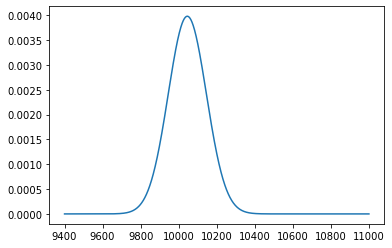

In [7]:
linspace = np.arange(9400, 11000, 1)
plt.plot(linspace, stats.poisson.pmf(linspace, r))

In [8]:
#Since detections are poission distributed then the std deviation is sqrt(r)
z=(r_o-r)/(np.sqrt(r))
z_sf = 2*stats.norm.sf(r,loc=9487) 
print(z_sf)
print(f'The z-score is z = {z}')

0.0
The z-score is z = -5.571124816057189


This is a very extraordinary measurement, since the probability is $5.5*10^{-10}$.

1.4 - Shooting with a bow, you have 3% chance of hitting a certain target.

Since there are 2 outcomes either hit or miss then it follows a binomial distribution.

In [9]:
p1oo20 = (0.97)**20
print(f'The probability of observing 1 hit in 20 shots is p = {p1oo20:.4f}')
psym = sp.symbols('p')
p1oo20sym = 0.03*sp.Sum((1-0.03)**psym, (psym, 20, sp.oo)).doit()
print(p1oo20sym)

The probability of observing 1 hit in 20 shots is p = 0.5438
0.543794342926747


In [10]:
def binomial(n, k, p):
    '''Returns the probability of k successes in n trials with probability p of success'''
    
    return stats.binom.pmf(k, n, p)

In [11]:
p100oo4000 = binomial(4000,100,0.03)
print(f'The probability of observing 100 hits in 4000 shots is p = {p100oo4000:.4f}')

The probability of observing 100 hits in 4000 shots is p = 0.0065


In [12]:
r = np.random # Random generator
r.seed(42)    # Set a random seed (but a fixed one)